# Data Generation for 2D Laplace Equation 
(Please reference to our paper **Physics-Informed Boundary Integral Networks (PIBI-Nets): a Data-Driven Approach for Solving Partial Differential Equations**.)

## Toy Example: Dirichlet Boundary Conditions 
---

# Problem setup

## Laplace equation 
$$ \Delta u(x) := \frac{\partial^2 u}{\partial x_1^2} + \frac{\partial^2 u}{\partial x_2^2} = 0 $$

$$x:=(x_1, x_2)\, \in \,\left([-1,1]\times [-1,1]\right)=:\Omega \subseteq \mathbb{R}^2$$

## Boundary conditions
\begin{equation}\label{eq:laplace_toy}
\begin{aligned}
    &\Delta u(x) = 0, \qquad\qquad &&&\text{in } \Omega=[-1,1]\\
    &\left.
    \begin{aligned}
        &u(x_1=-1,x_2)&&=\sin \left(\frac{3}{2\pi}\; x_2 + \frac{\pi}{2}\right),\\
        &u(x_1=1, x_2)&&=\frac{1}{2}(x_2+1), \\
        &u(x_1,x_2=-1)&&=
        \begin{cases}
            1-x_1,\;\;\;\, x_1>=0,\\
            x_1+1,\;\;\;\; x_1<0,
        \end{cases} \\
        &u(x_1,x_2=1)&&=
        \begin{cases}
            1,\;\;\;\, x_1>=0,\\
            1-|x_1|,\;\;\;\; x_1<0.
        \end{cases}
    \end{aligned}
    \right\} &&&\text{on }\partial\Omega
\end{aligned}
\end{equation}

In [1]:
import numpy as np
# plot package
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm # colormaps
from matplotlib.font_manager import FontProperties

In [2]:
import pandas as pd

In [3]:
matplotlib.rcParams['text.usetex'] = True
# font properties for plot titles
font_title = FontProperties()
font_title.set_family('serif')
font_title.set_name('Times New Roman')
font_title.set_size(45)  # Set the font size to match LaTeX, e.g., 12pt
font_title.set_weight('bold')
# font properties for plot titles
font_axis = FontProperties()
font_axis.set_family('serif')
font_axis.set_name('Times New Roman')
font_axis.set_size(115)  # Set the font size to match LaTeX, e.g., 12pt
# font properties for 3d plot titles
font_axis_3d = FontProperties()
font_axis_3d.set_family('serif')
font_axis_3d.set_name('Times New Roman')
font_axis_3d.set_size(90)  # Set the font size to match LaTeX, e.g., 12pt

## Computational domain

In [4]:
# solution domain (x1, x2) in [-1,1]x[-1,1]
Omega = np.array([[-1, 1],   # x1 subdomain
                  [-1, 1]])  # x2 subdomain

def u_hat(x):
    return np.where(x < 0, x + 1, 1 - x)

def u_sin(x):
    return np.sin(3/2 * np.pi * x + np.pi/2)

def u_plin(x):
    return np.where(x<0, 1-abs(x), 1)

def u_linear(x):
    return (x + 1) / 2

# build mesh
n = 101 # grid size
x1 = np.linspace(-1, 1 , n) # (n,)
x2 = np.linspace(-1, 1 , n)
X1, X2 = np.meshgrid(x1, x2) # (n,n)
Delta = 2/(np.size(x1)-1)
print('Delta x:', Delta)

Delta x: 0.02


In [5]:
# Reshape X1 and X2 as a (N, 2) vector
N = X1.shape[0] * X1.shape[1]
X_mesh = np.column_stack((X1.reshape(N,1), X2.reshape(N,1)))
# save X = (x1,x2)
np.savetxt('X_mesh.csv', X_mesh, delimiter=",", header="x1,x2", fmt="%.6f", comments='')

# Solution with finite difference (FD) method

In [13]:
# solve pde by using finite differences
def laplace_equation(n):
    """
    finite difference solver for 2D Laplace equation
    
    Args:
        - n: integer, n*n number of gridpoints in domain Omega

    Returns:
        - u: np.array (n,n), solution array of Laplace equation 
    """
    
    # solution matrix initialisation
    u = np.zeros((n, n))
    
    # define the boundary conditions
    u[:,0] = u_sin(x2)
    u[0,:] =  u_hat(x1)
    u[-1,:] = u_plin(x1)
    u[:,-1] = u_linear(x2)

    # define the relative tolerance and maximum number of iterations
    tol = 1e-4# adjustable residuum precision
    maxiter = 10000 # adjustable

    # FD-iteration to find pde solution
    for iter in range(maxiter):
        u_prev = np.copy(u)
        for i in range(1,n-1):
            for j in range(1,n-1):
                u[i,j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1])/4
        print('res', np.linalg.norm(u-u_prev), 'iter', iter)
        # check if the solution has converged
        if np.linalg.norm(u-u_prev) < tol:
            break
    return u

# compute the solution
u = laplace_equation(n)
# save solution in a vector as ground truth
u_num = u.reshape(N,1)
np.savetxt('u_num.csv', u_num, header="u", fmt="%.6f", comments='')

res 4.640119616673482 iter 0
res 2.511161441262228 iter 1
res 1.7630657431920802 iter 2
res 1.3823827223534968 iter 3
res 1.149178970129977 iter 4
res 0.9900707607061594 iter 5
res 0.8737624445670885 iter 6
res 0.7845770894750261 iter 7
res 0.7137463401396018 iter 8
res 0.6559598009629294 iter 9
res 0.6078021662887946 iter 10
res 0.5669711502248009 iter 11
res 0.5318548703777808 iter 12
res 0.5012890872414861 iter 13
res 0.47441063744488027 iter 14
res 0.4505652021595263 iter 15
res 0.42924719881927725 iter 16
res 0.41005941390104345 iter 17
res 0.39268517809414316 iter 18
res 0.376868744370447 iter 19
res 0.3624011690654897 iter 20
res 0.3491099688091408 iter 21
res 0.33685142080165387 iter 22
res 0.3255047472844742 iter 23
res 0.314967665127041 iter 24
res 0.3051529391763659 iter 25
res 0.29598568367914657 iter 26
res 0.28740122813787805 iter 27
res 0.2793434138975025 iter 28
res 0.2717632228852304 iter 29
res 0.264617664976105 iter 30
res 0.2578688685489005 iter 31
res 0.25148333201

res 0.0435036562543272 iter 263
res 0.04337153747431845 iter 264
res 0.04324039111117953 iter 265
res 0.04311020629553054 iter 266
res 0.042980972318341915 iter 267
res 0.04285267862801143 iter 268
res 0.04272531482750321 iter 269
res 0.042598870671545025 iter 270
res 0.042473336063885446 iter 271
res 0.04234870105460817 iter 272
res 0.04222495583750044 iter 273
res 0.04210209074747831 iter 274
res 0.04198009625806356 iter 275
res 0.04185896297891292 iter 276
res 0.04173868165339854 iter 277
res 0.04161924315623748 iter 278
res 0.041500638491170035 iter 279
res 0.041382858788685556 iter 280
res 0.041265895303794105 iter 281
res 0.04114973941384418 iter 282
res 0.04103438261638377 iter 283
res 0.040919816527065285 iter 284
res 0.04080603287759225 iter 285
res 0.04069302351370786 iter 286
res 0.04058078039322396 iter 287
res 0.04046929558408848 iter 288
res 0.04035856126249303 iter 289
res 0.04024856971101711 iter 290
res 0.04013931331680963 iter 291
res 0.040030784569806695 iter 292
res

res 0.026172281032773467 iter 511
res 0.026134238026171583 iter 512
res 0.026096319771468833 iter 513
res 0.02605852546092593 iter 514
res 0.026020854293376954 iter 515
res 0.0259833054741694 iter 516
res 0.025945878215106057 iter 517
res 0.025908571734386633 iter 518
res 0.02587138525655068 iter 519
res 0.02583431801241997 iter 520
res 0.025797369239043563 iter 521
res 0.025760538179640826 iter 522
res 0.025723824083547377 iter 523
res 0.02568722620615975 iter 524
res 0.025650743808881885 iter 525
res 0.025614376159071372 iter 526
res 0.025578122529986883 iter 527
res 0.025541982200735683 iter 528
res 0.02550595445622119 iter 529
res 0.02547003858709285 iter 530
res 0.025434233889693996 iter 531
res 0.025398539666012663 iter 532
res 0.02536295522363124 iter 533
res 0.025327479875676722 iter 534
res 0.025292112940772944 iter 535
res 0.025256853742991317 iter 536
res 0.025221701611803343 iter 537
res 0.02518665588203314 iter 538
res 0.02515171589381057 iter 539
res 0.025116880992524838 

res 0.01911990433755591 iter 764
res 0.019098685407255563 iter 765
res 0.01907750119262455 iter 766
res 0.01905635156806564 iter 767
res 0.019035236408784767 iter 768
res 0.01901415559078521 iter 769
res 0.018993108990861252 iter 770
res 0.018972096486591834 iter 771
res 0.018951117956334546 iter 772
res 0.018930173279219694 iter 773
res 0.018909262335144297 iter 774
res 0.018888385004765775 iter 775
res 0.0188675411694965 iter 776
res 0.018846730711497905 iter 777
res 0.018825953513674294 iter 778
res 0.018805209459667405 iter 779
res 0.01878449843385076 iter 780
res 0.018763820321324 iter 781
res 0.018743175007906433 iter 782
res 0.01872256238013315 iter 783
res 0.01870198232524774 iter 784
res 0.01868143473119834 iter 785
res 0.018660919486630907 iter 786
res 0.018640436480884502 iter 787
res 0.01861998560398609 iter 788
res 0.018599566746644876 iter 789
res 0.018579179800246964 iter 790
res 0.01855882465685069 iter 791
res 0.01853850120918108 iter 792
res 0.018518209350624683 iter 

res 0.014694193462193587 iter 1012
res 0.014679079801686892 iter 1013
res 0.014663984160794738 iter 1014
res 0.014648906504943403 iter 1015
res 0.014633846799695663 iter 1016
res 0.01461880501075088 iter 1017
res 0.014603781103943428 iter 1018
res 0.014588775045242152 iter 1019
res 0.01457378680074977 iter 1020
res 0.014558816336701585 iter 1021
res 0.014543863619464843 iter 1022
res 0.014528928615538101 iter 1023
res 0.01451401129154997 iter 1024
res 0.01449911161425887 iter 1025
res 0.0144842295505519 iter 1026
res 0.01446936506744374 iter 1027
res 0.014454518132076611 iter 1028
res 0.01443968871171911 iter 1029
res 0.014424876773765194 iter 1030
res 0.014410082285733664 iter 1031
res 0.01439530521526757 iter 1032
res 0.014380545530133015 iter 1033
res 0.014365803198218539 iter 1034
res 0.014351078187534956 iter 1035
res 0.0143363704662136 iter 1036
res 0.014321680002506524 iter 1037
res 0.01430700676478506 iter 1038
res 0.014292350721539471 iter 1039
res 0.014277711841378136 iter 10

res 0.011554063283684586 iter 1249
res 0.011542472819879933 iter 1250
res 0.011530894728682343 iter 1251
res 0.011519328993396034 iter 1252
res 0.01150777559736423 iter 1253
res 0.011496234523969327 iter 1254
res 0.011484705756632553 iter 1255
res 0.011473189278813724 iter 1256
res 0.011461685074011579 iter 1257
res 0.011450193125762688 iter 1258
res 0.011438713417642351 iter 1259
res 0.011427245933263476 iter 1260
res 0.011415790656277007 iter 1261
res 0.011404347570371691 iter 1262
res 0.011392916659273982 iter 1263
res 0.01138149790674732 iter 1264
res 0.01137009129659286 iter 1265
res 0.011358696812648261 iter 1266
res 0.011347314438788817 iter 1267
res 0.011335944158926085 iter 1268
res 0.011324585957008469 iter 1269
res 0.011313239817020787 iter 1270
res 0.011301905722984416 iter 1271
res 0.011290583658956424 iter 1272
res 0.011279273609030143 iter 1273
res 0.011267975557335073 iter 1274
res 0.011256689488035992 iter 1275
res 0.011245415385333468 iter 1276
res 0.01123415323346338

res 0.009066572063944955 iter 1492
res 0.009057571343976719 iter 1493
res 0.009048579801607013 iter 1494
res 0.009039597426379314 iter 1495
res 0.009030624207854034 iter 1496
res 0.009021660135607625 iter 1497
res 0.009012705199233471 iter 1498
res 0.009003759388342126 iter 1499
res 0.008994822692559846 iter 1500
res 0.008985895101529568 iter 1501
res 0.00897697660491154 iter 1502
res 0.008968067192381331 iter 1503
res 0.0089591668536315 iter 1504
res 0.008950275578370633 iter 1505
res 0.008941393356323902 iter 1506
res 0.008932520177232658 iter 1507
res 0.00892365603085413 iter 1508
res 0.008914800906962055 iter 1509
res 0.0089059547953461 iter 1510
res 0.008897117685812032 iter 1511
res 0.008888289568181707 iter 1512
res 0.008879470432292652 iter 1513
res 0.008870660267998876 iter 1514
res 0.008861859065169696 iter 1515
res 0.008853066813690661 iter 1516
res 0.008844283503462995 iter 1517
res 0.008835509124403566 iter 1518
res 0.008826743666444965 iter 1519
res 0.00881798711953566 it

res 0.007140756853151478 iter 1733
res 0.007133698749138555 iter 1734
res 0.007126647700727335 iter 1735
res 0.007119603700489431 iter 1736
res 0.007112566741005896 iter 1737
res 0.0071055368148671095 iter 1738
res 0.007098513914673238 iter 1739
res 0.007091498033033282 iter 1740
res 0.007084489162566242 iter 1741
res 0.0070774872958998866 iter 1742
res 0.007070492425671858 iter 1743
res 0.007063504544528837 iter 1744
res 0.007056523645126681 iter 1745
res 0.007049549720131166 iter 1746
res 0.007042582762216826 iter 1747
res 0.0070356227640673225 iter 1748
res 0.007028669718375918 iter 1749
res 0.00702172361784508 iter 1750
res 0.007014784455186271 iter 1751
res 0.007007852223120448 iter 1752
res 0.007000926914377084 iter 1753
res 0.0069940085216957226 iter 1754
res 0.0069870970378243975 iter 1755
res 0.006980192455520529 iter 1756
res 0.006973294767550487 iter 1757
res 0.00696640396668973 iter 1758
res 0.006959520045722851 iter 1759
res 0.006952642997443583 iter 1760
res 0.00694577281

res 0.005611233385055048 iter 1977
res 0.005605696908390219 iter 1978
res 0.005600165917687215 iter 1979
res 0.0055946404073853725 iter 1980
res 0.005589120371929922 iter 1981
res 0.0055836058057725565 iter 1982
res 0.0055780967033709095 iter 1983
res 0.005572593059189212 iter 1984
res 0.005567094867697366 iter 1985
res 0.00556160212337193 iter 1986
res 0.005556114820695164 iter 1987
res 0.005550632954155544 iter 1988
res 0.005545156518248166 iter 1989
res 0.005539685507473671 iter 1990
res 0.005534219916339259 iter 1991
res 0.005528759739357654 iter 1992
res 0.0055233049710481635 iter 1993
res 0.005517855605936339 iter 1994
res 0.005512411638553366 iter 1995
res 0.005506973063436623 iter 1996
res 0.00550153987512967 iter 1997
res 0.005496112068182021 iter 1998
res 0.005490689637149471 iter 1999
res 0.005485272576593317 iter 2000
res 0.005479860881081427 iter 2001
res 0.005474454545187456 iter 2002
res 0.005469053563491127 iter 2003
res 0.00546365793057808 iter 2004
res 0.0054582676410

res 0.004441071670490056 iter 2214
res 0.004436692379809995 iter 2215
res 0.0044323174128987515 iter 2216
res 0.004427946765447512 iter 2217
res 0.004423580433152019 iter 2218
res 0.004419218411712721 iter 2219
res 0.004414860696834055 iter 2220
res 0.004410507284225201 iter 2221
res 0.004406158169600109 iter 2222
res 0.004401813348676543 iter 2223
res 0.004397472817177481 iter 2224
res 0.004393136570829772 iter 2225
res 0.004388804605364934 iter 2226
res 0.004384476916518854 iter 2227
res 0.004380153500031978 iter 2228
res 0.0043758343516491 iter 2229
res 0.004371519467119697 iter 2230
res 0.004367208842197179 iter 2231
res 0.0043629024726396844 iter 2232
res 0.004358600354209867 iter 2233
res 0.0043543024826743215 iter 2234
res 0.004350008853804949 iter 2235
res 0.004345719463376924 iter 2236
res 0.004341434307170548 iter 2237
res 0.00433715338097029 iter 2238
res 0.004332876680564929 iter 2239
res 0.004328604201748216 iter 2240
res 0.0043243359403170225 iter 2241
res 0.0043200718920

res 0.003497909035605889 iter 2456
res 0.0034944602211241117 iter 2457
res 0.003491014807044279 iter 2458
res 0.0034875727900036636 iter 2459
res 0.0034841341666427645 iter 2460
res 0.003480698933605359 iter 2461
res 0.003477267087538842 iter 2462
res 0.0034738386250939292 iter 2463
res 0.0034704135429246582 iter 2464
res 0.00346699183768833 iter 2465
res 0.003463573506045993 iter 2466
res 0.003460158544661517 iter 2467
res 0.003456746950202603 iter 2468
res 0.0034533387193401177 iter 2469
res 0.0034499338487482207 iter 2470
res 0.0034465323351045287 iter 2471
res 0.0034431341750897934 iter 2472
res 0.003439739365388789 iter 2473
res 0.003436347902688739 iter 2474
res 0.0034329597836804714 iter 2475
res 0.0034295750050584483 iter 2476
res 0.003426193563520492 iter 2477
res 0.0034228154557672205 iter 2478
res 0.003419440678502709 iter 2479
res 0.0034160692284350203 iter 2480
res 0.003412701102274744 iter 2481
res 0.0034093362967361237 iter 2482
res 0.003405974808536825 iter 2483
res 0.0

res 0.0027851187145180836 iter 2687
res 0.002782372529177085 iter 2688
res 0.0027796290504935287 iter 2689
res 0.0027768882757987245 iter 2690
res 0.00277415020242619 iter 2691
res 0.0027714148277121335 iter 2692
res 0.002768682148995787 iter 2693
res 0.0027659521636185175 iter 2694
res 0.0027632248689243534 iter 2695
res 0.0027605002622605856 iter 2696
res 0.0027577783409764144 iter 2697
res 0.002755059102424048 iter 2698
res 0.002752342543958325 iter 2699
res 0.0027496286629366505 iter 2700
res 0.0027469174567187784 iter 2701
res 0.0027442089226676313 iter 2702
res 0.002741503058148293 iter 2703
res 0.0027387998605286246 iter 2704
res 0.0027360993271793588 iter 2705
res 0.0027334014554731352 iter 2706
res 0.002730706242786096 iter 2707
res 0.0027280136864963615 iter 2708
res 0.002725323783984778 iter 2709
res 0.0027226365326348955 iter 2710
res 0.002719951929832779 iter 2711
res 0.002717269972967297 iter 2712
res 0.0027145906594294045 iter 2713
res 0.002711913986613327 iter 2714
res 

res 0.002204444381288607 iter 2924
res 0.0022022705074934996 iter 2925
res 0.0022000987763314416 iter 2926
res 0.0021979291856919223 iter 2927
res 0.0021957617334661065 iter 2928
res 0.0021935964175471947 iter 2929
res 0.002191433235830933 iter 2930
res 0.0021892721862149292 iter 2931
res 0.0021871132665987245 iter 2932
res 0.0021849564748839855 iter 2933
res 0.002182801808974403 iter 2934
res 0.002180649266776094 iter 2935
res 0.0021784988461966094 iter 2936
res 0.0021763505451463114 iter 2937
res 0.002174204361537045 iter 2938
res 0.0021720602932828147 iter 2939
res 0.0021699183382999808 iter 2940
res 0.0021677784945066153 iter 2941
res 0.0021656407598229575 iter 2942
res 0.0021635051321716122 iter 2943
res 0.002161371609476663 iter 2944
res 0.002159240189664454 iter 2945
res 0.00215711087066391 iter 2946
res 0.002154983650404918 iter 2947
res 0.0021528585268206384 iter 2948
res 0.0021507354978450507 iter 2949
res 0.002148614561415302 iter 2950
res 0.0021464957154697603 iter 2951
res

res 0.0017534176248281807 iter 3156
res 0.0017516883271578364 iter 3157
res 0.0017499607342003358 iter 3158
res 0.001748234844276632 iter 3159
res 0.0017465106557089931 iter 3160
res 0.0017447881668217165 iter 3161
res 0.0017430673759405199 iter 3162
res 0.0017413482813931893 iter 3163
res 0.001739630881508202 iter 3164
res 0.001737915174616761 iter 3165
res 0.0017362011590509386 iter 3166
res 0.001734488833145128 iter 3167
res 0.001732778195234769 iter 3168
res 0.0017310692436571704 iter 3169
res 0.0017293619767510522 iter 3170
res 0.0017276563928574618 iter 3171
res 0.001725952490318204 iter 3172
res 0.001724250267477401 iter 3173
res 0.0017225497226801643 iter 3174
res 0.0017208508542740227 iter 3175
res 0.0017191536606073767 iter 3176
res 0.0017174581400306696 iter 3177
res 0.001715764290895938 iter 3178
res 0.0017140721115567012 iter 3179
res 0.0017123816003682445 iter 3180
res 0.0017106927556872374 iter 3181
res 0.0017090055758723398 iter 3182
res 0.0017073200592834827 iter 3183


res 0.0013850357818340473 iter 3395
res 0.0013836696613237077 iter 3396
res 0.0013823048877628895 iter 3397
res 0.0013809414598245043 iter 3398
res 0.0013795793761826464 iter 3399
res 0.0013782186355132892 iter 3400
res 0.0013768592364930186 iter 3401
res 0.0013755011778001848 iter 3402
res 0.0013741444581139562 iter 3403
res 0.0013727890761155007 iter 3404
res 0.0013714350304867896 iter 3405
res 0.001370082319911081 iter 3406
res 0.0013687309430731422 iter 3407
res 0.0013673808986589618 iter 3408
res 0.0013660321853558597 iter 3409
res 0.001364684801852121 iter 3410
res 0.0013633387468379855 iter 3411
res 0.0013619940190041698 iter 3412
res 0.00136065061704339 iter 3413
res 0.0013593085396492075 iter 3414
res 0.0013579677855166774 iter 3415
res 0.001356628353342337 iter 3416
res 0.0013552902418232317 iter 3417
res 0.0013539534496583312 iter 3418
res 0.0013526179755481117 iter 3419
res 0.001351283818193591 iter 3420
res 0.0013499509762978483 iter 3421
res 0.0013486194485644604 iter 342

res 0.0010918680731823011 iter 3636
res 0.0010907910302589976 iter 3637
res 0.0010897150494430065 iter 3638
res 0.0010886401296875683 iter 3639
res 0.0010875662699469583 iter 3640
res 0.0010864934691763267 iter 3641
res 0.001085421726332443 iter 3642
res 0.0010843510403722616 iter 3643
res 0.0010832814102546902 iter 3644
res 0.0010822128349390191 iter 3645
res 0.0010811453133854683 iter 3646
res 0.0010800788445558633 iter 3647
res 0.0010790134274125086 iter 3648
res 0.0010779490609192017 iter 3649
res 0.0010768857440402444 iter 3650
res 0.0010758234757417412 iter 3651
res 0.0010747622549895244 iter 3652
res 0.0010737020807520064 iter 3653
res 0.001072642951997034 iter 3654
res 0.0010715848676947455 iter 3655
res 0.0010705278268159266 iter 3656
res 0.0010694718283319117 iter 3657
res 0.0010684168712156244 iter 3658
res 0.0010673629544405952 iter 3659
res 0.0010663100769816745 iter 3660
res 0.0010652582378147682 iter 3661
res 0.0010642074359160506 iter 3662
res 0.0010631576702638445 iter

res 0.0008658524600960905 iter 3871
res 0.0008649983133077098 iter 3872
res 0.0008641450089332464 iter 3873
res 0.0008632925461426299 iter 3874
res 0.0008624409241056519 iter 3875
res 0.0008615901419937353 iter 3876
res 0.0008607401989789262 iter 3877
res 0.0008598910942341493 iter 3878
res 0.0008590428269330645 iter 3879
res 0.0008581953962499949 iter 3880
res 0.0008573488013601944 iter 3881
res 0.0008565030414399586 iter 3882
res 0.0008556581156662289 iter 3883
res 0.0008548140232163596 iter 3884
res 0.0008539707632692074 iter 3885
res 0.0008531283350038842 iter 3886
res 0.0008522867376009066 iter 3887
res 0.0008514459702408476 iter 3888
res 0.0008506060321057246 iter 3889
res 0.0008497669223778802 iter 3890
res 0.000848928640240735 iter 3891
res 0.0008480911848785737 iter 3892
res 0.0008472545554761914 iter 3893
res 0.000846418751219644 iter 3894
res 0.0008455837712954426 iter 3895
res 0.0008447496148905094 iter 3896
res 0.0008439162811936576 iter 3897
res 0.0008430837693936293 iter

res 0.0006852596064812757 iter 4108
res 0.0006845835810720449 iter 4109
res 0.0006839082224707114 iter 4110
res 0.0006832335300199107 iter 4111
res 0.0006825595030629635 iter 4112
res 0.0006818861409435361 iter 4113
res 0.0006812134430061584 iter 4114
res 0.0006805414085960077 iter 4115
res 0.0006798700370585517 iter 4116
res 0.000679199327740833 iter 4117
res 0.0006785292799891714 iter 4118
res 0.0006778598931518842 iter 4119
res 0.000677191166576552 iter 4120
res 0.0006765230996130985 iter 4121
res 0.0006758556916104695 iter 4122
res 0.000675188941919386 iter 4123
res 0.0006745228498903118 iter 4124
res 0.000673857414874995 iter 4125
res 0.0006731926362255657 iter 4126
res 0.0006725285132950762 iter 4127
res 0.000671865045436512 iter 4128
res 0.000671202232004604 iter 4129
res 0.0006705400723532703 iter 4130
res 0.0006698785658389439 iter 4131
res 0.0006692177118167258 iter 4132
res 0.0006685575096434954 iter 4133
res 0.000667897958676667 iter 4134
res 0.000667239058273924 iter 4135


res 0.0005444740267867078 iter 4341
res 0.0005439368726930506 iter 4342
res 0.0005434002484699453 iter 4343
res 0.0005428641535944589 iter 4344
res 0.0005423285875445972 iter 4345
res 0.0005417935497992178 iter 4346
res 0.0005412590398371849 iter 4347
res 0.0005407250571375597 iter 4348
res 0.0005401916011812759 iter 4349
res 0.000539658671448025 iter 4350
res 0.0005391262674193382 iter 4351
res 0.0005385943885765971 iter 4352
res 0.0005380630344019081 iter 4353
res 0.0005375322043778469 iter 4354
res 0.0005370018979876664 iter 4355
res 0.0005364721147146451 iter 4356
res 0.0005359428540434003 iter 4357
res 0.0005354141154579665 iter 4358
res 0.0005348858984438355 iter 4359
res 0.0005343582024866822 iter 4360
res 0.000533831027072529 iter 4361
res 0.0005333043716882254 iter 4362
res 0.0005327782358205186 iter 4363
res 0.0005322526189574456 iter 4364
res 0.0005317275205870168 iter 4365
res 0.0005312029401979691 iter 4366
res 0.0005306788772794713 iter 4367
res 0.0005301553313212443 iter

res 0.000433464795022192 iter 4572
res 0.0004330371479466424 iter 4573
res 0.00043260992274248694 iter 4574
res 0.0004321831189939155 iter 4575
res 0.00043175673628526024 iter 4576
res 0.00043133077420106296 iter 4577
res 0.0004309052323264713 iter 4578
res 0.0004304801102473071 iter 4579
res 0.0004300554075492781 iter 4580
res 0.0004296311238188213 iter 4581
res 0.00042920725864270645 iter 4582
res 0.0004287838116081753 iter 4583
res 0.00042836078230249294 iter 4584
res 0.000427938170314082 iter 4585
res 0.0004275159752313097 iter 4586
res 0.0004270941966427456 iter 4587
res 0.00042667283413774966 iter 4588
res 0.00042625188730567034 iter 4589
res 0.0004258313557371766 iter 4590
res 0.000425411239021809 iter 4591
res 0.0004249915367511267 iter 4592
res 0.0004245722485162986 iter 4593
res 0.00042415337390842964 iter 4594
res 0.0004237349125199742 iter 4595
res 0.0004233168639433028 iter 4596
res 0.0004228992277714919 iter 4597
res 0.000422482003597068 iter 4598
res 0.000422065191014548

res 0.00034679431978872506 iter 4798
res 0.00034645217439133186 iter 4799
res 0.0003461103665320434 iter 4800
res 0.0003457688958778122 iter 4801
res 0.00034542776209588654 iter 4802
res 0.000345086964854185 iter 4803
res 0.00034474650382093955 iter 4804
res 0.00034440637866399725 iter 4805
res 0.0003440665890523531 iter 4806
res 0.000343727134655064 iter 4807
res 0.0003433880151412299 iter 4808
res 0.0003430492301808882 iter 4809
res 0.00034271077944393087 iter 4810
res 0.0003423726626004223 iter 4811
res 0.0003420348793213224 iter 4812
res 0.0003416974292772819 iter 4813
res 0.00034136031213989057 iter 4814
res 0.0003410235275809353 iter 4815
res 0.0003406870752719415 iter 4816
res 0.00034035095488546086 iter 4817
res 0.0003400151660938815 iter 4818
res 0.00033967970857015346 iter 4819
res 0.0003393445819877101 iter 4820
res 0.0003390097860200079 iter 4821
res 0.00033867532034088346 iter 4822
res 0.0003383411846245434 iter 4823
res 0.0003380073785455203 iter 4824
res 0.00033767390177

res 0.0002774525842635869 iter 5024
res 0.00027717884783169346 iter 5025
res 0.0002769053814579668 iter 5026
res 0.0002766321848758646 iter 5027
res 0.0002763592578192534 iter 5028
res 0.00027608660002224265 iter 5029
res 0.0002758142112192186 iter 5030
res 0.00027554209114500906 iter 5031
res 0.0002752702395342843 iter 5032
res 0.00027499865612237424 iter 5033
res 0.00027472734064462395 iter 5034
res 0.000274456292836555 iter 5035
res 0.00027418551243466456 iter 5036
res 0.00027391499917463105 iter 5037
res 0.0002736447527931305 iter 5038
res 0.00027337477302680403 iter 5039
res 0.0002731050596128712 iter 5040
res 0.0002728356122884194 iter 5041
res 0.000272566430791014 iter 5042
res 0.00027229751485830607 iter 5043
res 0.00027202886422852794 iter 5044
res 0.0002717604786399401 iter 5045
res 0.00027149235783083785 iter 5046
res 0.00027122450154014294 iter 5047
res 0.00027095690950729027 iter 5048
res 0.0002706895814710422 iter 5049
res 0.00027042251717136024 iter 5050
res 0.0002701557

res 0.00022219449449276384 iter 5249
res 0.0002219752741834266 iter 5250
res 0.0002217562701531741 iter 5251
res 0.00022153748218860158 iter 5252
res 0.00022131891007657532 iter 5253
res 0.0002211005536038467 iter 5254
res 0.0002208824125581457 iter 5255
res 0.0002206644867266332 iter 5256
res 0.00022044677589725452 iter 5257
res 0.00022022927985774056 iter 5258
res 0.00022001199839612434 iter 5259
res 0.00021979493130076303 iter 5260
res 0.0002195780783604209 iter 5261
res 0.00021936143936353007 iter 5262
res 0.00021914501409916247 iter 5263
res 0.00021892880235667352 iter 5264
res 0.00021871280392505617 iter 5265
res 0.0002184970185940837 iter 5266
res 0.00021828144615325648 iter 5267
res 0.00021806608639290257 iter 5268
res 0.00021785093910312513 iter 5269
res 0.00021763600407434348 iter 5270
res 0.00021742128109720617 iter 5271
res 0.00021720676996209428 iter 5272
res 0.00021699247046058376 iter 5273
res 0.00021677838238360166 iter 5274
res 0.0002165645055225434 iter 5275
res 0.000

res 0.00017741528464756468 iter 5477
res 0.00017724024307970418 iter 5478
res 0.00017706537420744898 iter 5479
res 0.0001768906778602502 iter 5480
res 0.00017671615386839626 iter 5481
res 0.0001765418020615744 iter 5482
res 0.00017636762226979708 iter 5483
res 0.0001761936143235237 iter 5484
res 0.00017601977805322395 iter 5485
res 0.00017584611328931866 iter 5486
res 0.000175672619862877 iter 5487
res 0.0001754992976048622 iter 5488
res 0.0001753261463461062 iter 5489
res 0.00017515316591839103 iter 5490
res 0.00017498035615272388 iter 5491
res 0.00017480771688092547 iter 5492
res 0.00017463524793490513 iter 5493
res 0.0001744629491464338 iter 5494
res 0.00017429082034784804 iter 5495
res 0.00017411886137107927 iter 5496
res 0.0001739470720491288 iter 5497
res 0.00017377545221410314 iter 5498
res 0.00017360400169917278 iter 5499
res 0.00017343272033718072 iter 5500
res 0.00017326160796118876 iter 5501
res 0.00017309066440455984 iter 5502
res 0.0001729198895007001 iter 5503
res 0.00017

res 0.00014138093995012222 iter 5707
res 0.00014124144998882052 iter 5708
res 0.0001411020976495826 iter 5709
res 0.00014096288279641752 iter 5710
res 0.0001408238052940144 iter 5711
res 0.00014068486500659022 iter 5712
res 0.00014054606179896763 iter 5713
res 0.00014040739553579972 iter 5714
res 0.0001402688660822209 iter 5715
res 0.00014013047330295963 iter 5716
res 0.00013999221706300174 iter 5717
res 0.0001398540972282213 iter 5718
res 0.0001397161136635152 iter 5719
res 0.00013957826623473381 iter 5720
res 0.00013944055480746286 iter 5721
res 0.00013930297924768568 iter 5722
res 0.00013916553942123027 iter 5723
res 0.00013902823519425247 iter 5724
res 0.00013889106643258308 iter 5725
res 0.00013875403300311963 iter 5726
res 0.00013861713477204555 iter 5727
res 0.00013848037160634706 iter 5728
res 0.00013834374337210945 iter 5729
res 0.00013820724993690624 iter 5730
res 0.0001380708911671777 iter 5731
res 0.00013793466693046751 iter 5732
res 0.00013779857709408043 iter 5733
res 0.0

res 0.00011322278113710366 iter 5932
res 0.00011311107237032677 iter 5933
res 0.00011299947381744338 iter 5934
res 0.00011288798536950498 iter 5935
res 0.00011277660691792711 iter 5936
res 0.00011266533835405782 iter 5937
res 0.00011255417956969553 iter 5938
res 0.00011244313045627471 iter 5939
res 0.00011233219090590984 iter 5940
res 0.00011222136081039977 iter 5941
res 0.00011211064006158569 iter 5942
res 0.00011200002855172557 iter 5943
res 0.00011188952617304598 iter 5944
res 0.00011177913281776899 iter 5945
res 0.00011166884837851612 iter 5946
res 0.00011155867274762964 iter 5947
res 0.00011144860581797984 iter 5948
res 0.00011133864748222963 iter 5949
res 0.00011122879763332083 iter 5950
res 0.00011111905616389175 iter 5951
res 0.00011100942296730543 iter 5952
res 0.00011089989793664943 iter 5953
res 0.00011079048096538354 iter 5954
res 0.0001106811719466186 iter 5955
res 0.00011057197077421053 iter 5956
res 0.00011046287734124952 iter 5957
res 0.00011035389154194588 iter 5958
re

## Plot FD solution

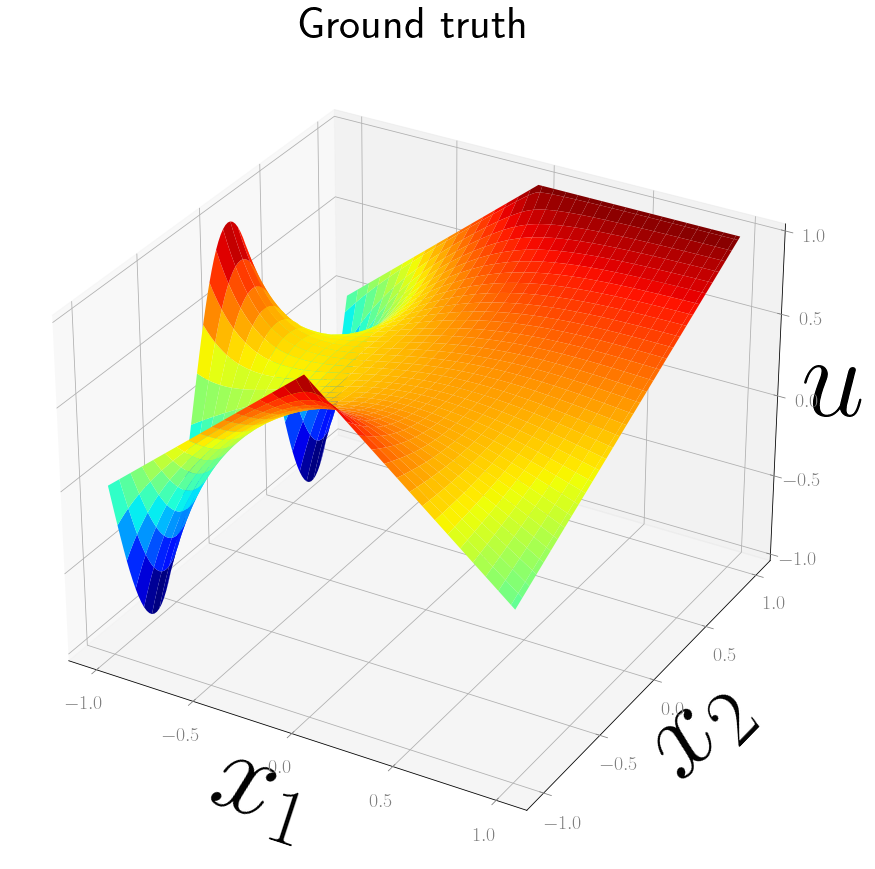

In [14]:
# plot FD solution using matplotlib
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, u, cmap=cm.jet, linewidth=1)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
#surf.set_clim(vmin=0, vmax=1) # limits to colorbar
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=20, pad=10)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
ax.set_zticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.tick_params(axis='z', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis, labelpad=19)
ax.set_ylabel('$x_2$', fontproperties=font_axis, labelpad=19)
ax.set_zlabel('$u$', fontproperties=font_axis, labelpad=15)
plt.title('Ground truth', fontproperties=font_title)
plt.show()

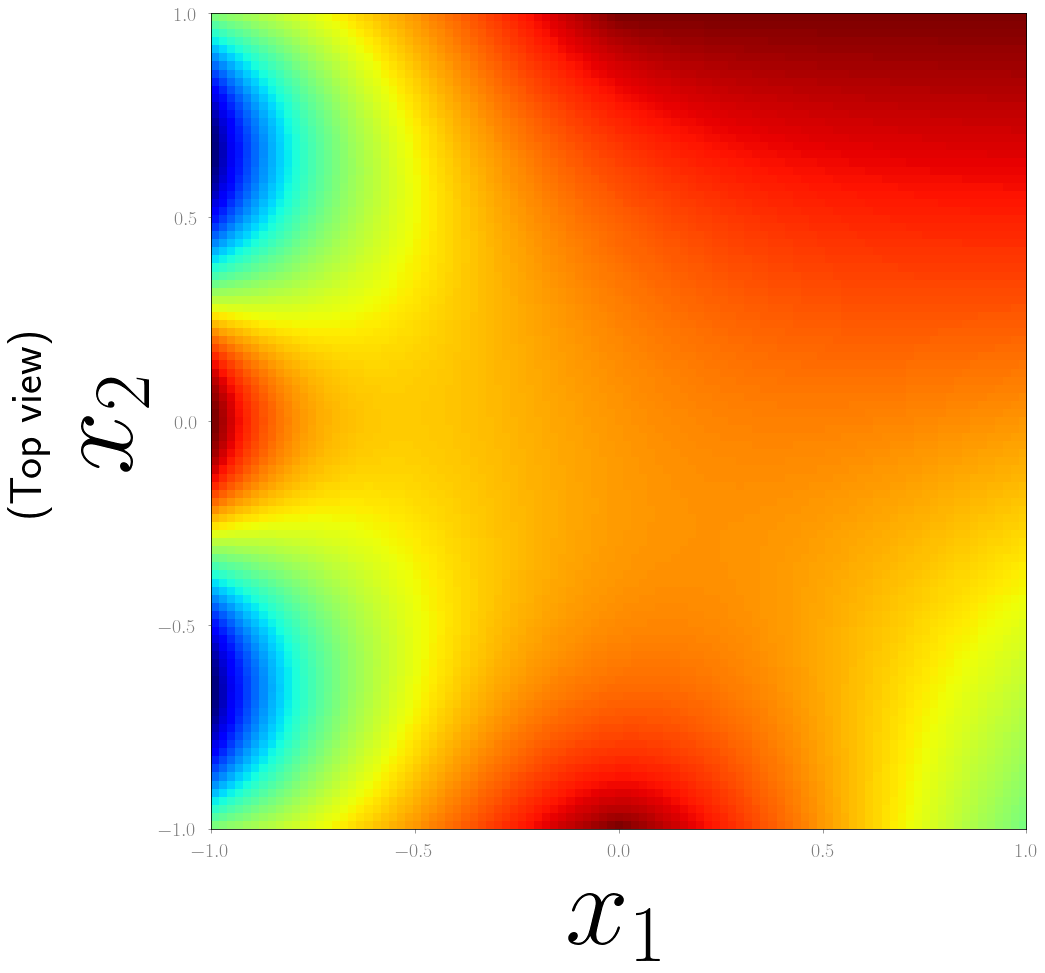

In [15]:
# plot FD solution using matplotlib
fig, ax = plt.subplots(figsize=(15, 15))
img = ax.imshow(u, cmap='jet', origin='lower', extent=[np.min(X1), np.max(X1), np.min(X2), np.max(X2)])
#fig.colorbar(img, ax=ax, shrink=0.8, aspect=10, pad=0.1)
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=20, pad=10)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis)#, labelpad=10)
ax.set_ylabel('$x_2$', fontproperties=font_axis)#, labelpad=4)
ax.text(-1.5, 0.0, '(Top view)', fontproperties=font_title, rotation=90, va='center')
plt.show()

## Devide solution into inner and boundary points

In [16]:
# devide solution u into inner and boundary points
# INNER
i_inner, j_inner = np.where(u[1:-1, 1:-1])
i_inner = i_inner + 1
j_inner = j_inner + 1
u_inner = u[i_inner,j_inner].reshape(n-2,n-2)
# BOUNDARY
i_boundary = []
j_boundary = []
u_boundary = [] # == u[i_boundary, j_boundary]
for i in range(u.shape[0]):
    for j in range(u.shape[1]):
        if i == 0 or i == u.shape[0]-1 or j == 0 or j == u.shape[1]-1:
            i_boundary.append(i)
            j_boundary.append(j)
            u_boundary.append(u[i, j]) 
u_boundary = np.array(u_boundary) # u_boundary == u[i_boundary, j_boundary]
i_boundary = np.array(i_boundary)
j_boundary = np.array(j_boundary)

# Sample random data points (from boundary and from inner)

In [17]:
# set the seed for randomness
n_samples_in = 80 # number of samples INSIDE

In [63]:
# uniform samples (inside of Omega)
indices = np.random.choice(u_inner.size, size=n_samples_in, replace=False)
i_in = i_inner[indices]
j_in = j_inner[indices]
# take uniform samples
u_in = u[i_in,j_in]
X1_in = X1[i_in,j_in]
X2_in = X2[i_in,j_in]

# save samples in a csv-file
data = np.column_stack((X1_in, X2_in, u_in))

# save data points, fmt - storage data in floating points
np.savetxt("dataset_laplace.csv", data, delimiter=",", header="x1,x2,u", fmt="%.6f", comments='') 

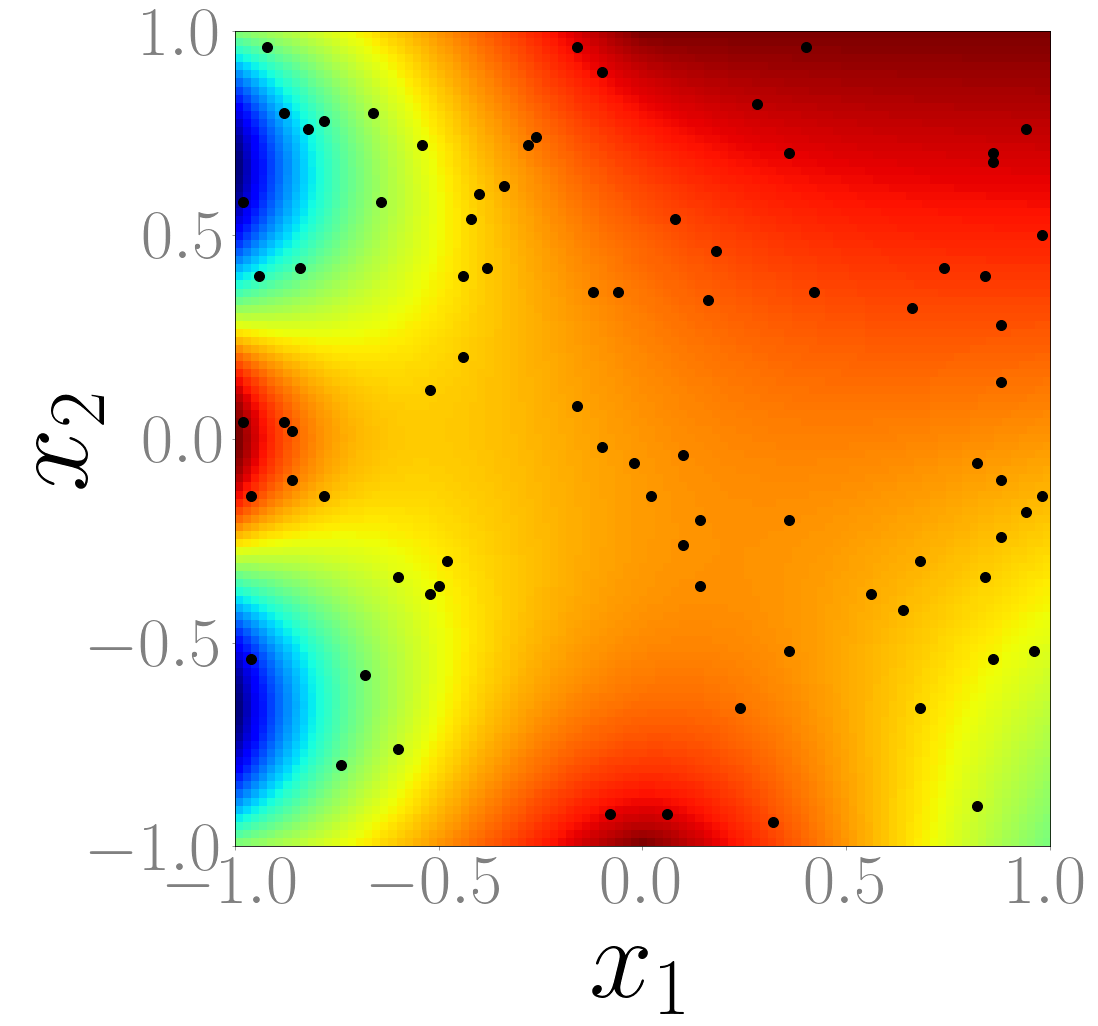

In [64]:
# plot FD solution using matplotlib
fig, ax = plt.subplots(figsize=(15, 15))
img = ax.imshow(u, cmap='jet', origin='lower', extent=[np.min(X1), np.max(X1), np.min(X2), np.max(X2)], vmin=-1, vmax=1)
ax.scatter(data[:,0], data[:,1], c='black', marker='o', s=10**2, alpha=1, zorder=4)
#fig.colorbar(img, ax=ax, shrink=0.8, aspect=10, pad=0.1)
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=70, pad=5)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis, labelpad=0)
ax.set_ylabel('$x_2$', fontproperties=font_axis, labelpad=-20)
#ax.text(-1.4, 0.0, '(Top view)', fontproperties=font_title, rotation=90, va='center')
#plt.savefig('num_2d.jpg', dpi=500, format='jpeg', bbox_inches='tight')
plt.show()

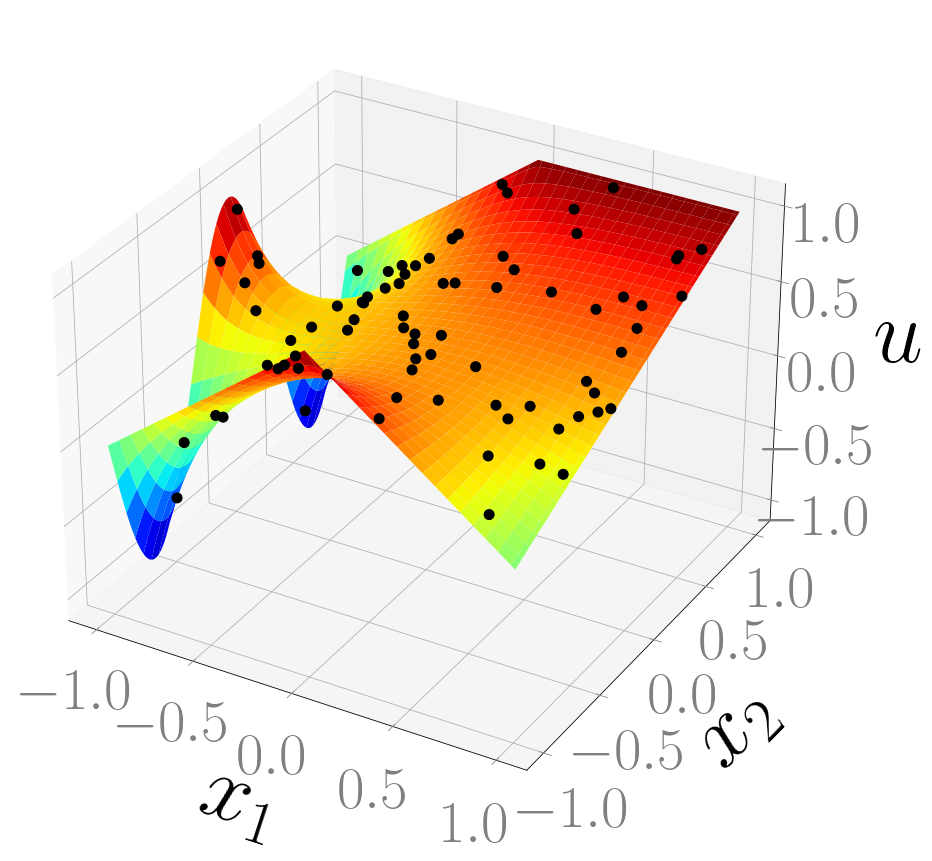

In [65]:
# plot FD solution using matplotlib
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d', computed_zorder=False)
surf = ax.plot_surface(X1, X2, u, cmap=cm.jet, alpha=1)
ax.scatter(data[:,0], data[:,1], data[:,2], c='black', marker='o', s=10**2, alpha=1, zorder=4)
#fig.colorbar(surf, shrink=0.5, aspect=15, pad=0.1)
surf.set_clim(vmin=-1, vmax=1) # limits to colorbar
# tick sizes
fig.axes[0].tick_params(axis="both", labelsize=20)
#fig.axes[1].tick_params(axis="both", labelsize=25)
# axis ticks
ax.tick_params(axis="both", labelsize=60, pad=20)
major_ticks = [-1,-0.5,0, 0.5,1]
ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)
ax.set_zticks(major_ticks)
# tick colour
ax.tick_params(axis='x', colors='grey')
ax.tick_params(axis='y', colors='grey')
ax.tick_params(axis='z', colors='grey')
# labels
ax.set_xlabel('$x_1$', fontproperties=font_axis_3d, labelpad=55)
ax.set_ylabel('$x_2$', fontproperties=font_axis_3d, labelpad=55)
ax.set_zlabel('$u$', fontproperties=font_axis_3d, labelpad=55)
#plt.title('Ground truth', fontproperties=font_title)
plt.savefig('num_3d.jpg', dpi=500, format='jpeg', bbox_inches='tight')
plt.show()